# Лабораторная работа 1.1
## Метод Эйлера
Решение ОДУ вида:\
$$y' = f(x, y)$$ на отрезке \[a, b\]\
с начальным условием \
$$y(a) = y_0$$
где f(x) - некоторая заданная, в общем случае, нелинейная функция двух переменных.\
Будем считать, что данная задача Коши имеет единственное решение, а также,
что это решение обладает той или иной степенью гладкости, необходимой для построения и применения того или иного метода.\
Метод Эйлера заключается в приближённом нахождении координат 
$$y_{i+1} = y_i + h * f(x_i, y_i)$$
где $h = {(b - a)} / {n}$ - расчетный шаг для n узлов,\
$x_i = a + h * i,\
i \in [0, n]$

<img src="euler_method.png" alt='euler_method' style="width:700px;"/>

## Задача
$$u = (u + u^2) + f(x), x \in (0, 1]$$
$$u(0) = u_0$$
$$f(x) = A * cos(k + x) - (A * sin(k + x) + A^2 * [sin(k+x)]^2)$$
$$u_0 = A * sin(k)$$
$$A, k - const > 0$$
### Аналитическое решение
$$u = A * sin(k + x)$$

## Работа

In [1]:
import numpy as np
import sympy as sp
import pandas as pd

from numpy import sin, cos

import seaborn as sns

In [2]:
A = 3 / 2
k = np.pi / 2

In [3]:
a = 0
b = 1
n = 100
h = (b - a) / n
y_0 = A * sin(k)

In [4]:
xs = [h * i + a for i in range(n + 1)]

In [5]:
ys = [y_0]

In [6]:
def f(x, y):
    return y + y ** 2 + A * cos(k + x) - (A * sin(k + x) + A ** 2 * (sin(k+x)) ** 2)

In [7]:
for i in range(100):
    d = f(xs[i], ys[i]) * h
    ys.append(ys[i] + d)

In [8]:
ys_true = [A * sin(k + x) for x in xs]

In [9]:
data = pd.DataFrame({'x': xs, 'y_hat': ys, 'y': ys_true})

In [10]:
data.set_index('x', inplace=True)

## Результат
на графике:\
y_hat - решение методом Эйлера\
y - аналитическое решение

<Axes: xlabel='x'>

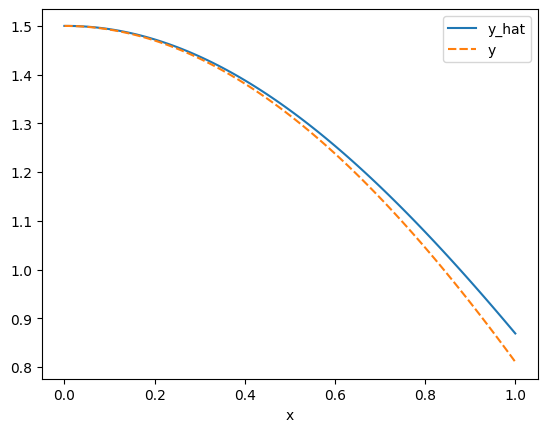

In [11]:
sns.lineplot(data)